In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('titanic_train.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape

(891, 12)

In [9]:
#Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Column Data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

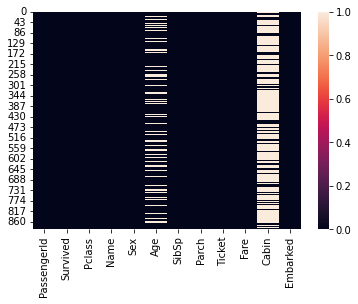

In [11]:
#Checking null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [12]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

866

In [13]:
#number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Replacing missing values of Age with mean values
mean_age = df.Age.mean()
df.Age.fillna(mean_age,inplace=True)

In [15]:
#Replacing missing values of Embarked with mode values
mode_emb = df.Embarked.mode()
df.Embarked.fillna(mode_emb[0],inplace=True)

In [16]:
#Checking unique Cabin values
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
#Dropping Cabin as almost all are null
df.drop("Cabin",axis=1,inplace=True)

In [18]:
#number of null values in each column now
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [20]:
#replacing family column in place of SibSp and Parch
df.insert(6, "Family", 0)
df['Family'] = df.SibSp + df.Parch
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Family,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,3,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,111369,30.0000,C


In [21]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['Sex','Embarked','Survived','Pclass']].copy()

male      577
female    314
Name: Sex, dtype: int64


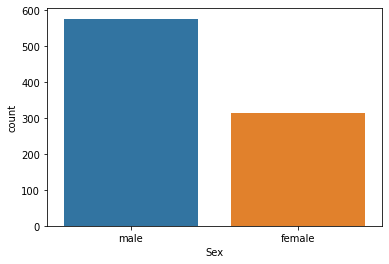

In [22]:
#Visualisation of Sex data
ax = sns.countplot(x='Sex',data=df_visualisation_nominal)
print(df_visualisation_nominal['Sex'].value_counts())

From above observation we can say that male(577) were more than female(314)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


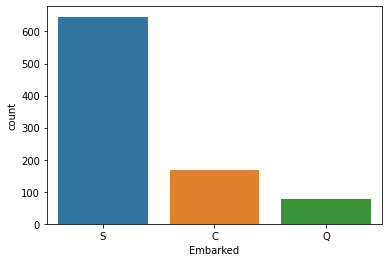

In [23]:
#Visualisation of Embarked data
ax = sns.countplot(x='Embarked',data=df_visualisation_nominal)
print(df_visualisation_nominal['Embarked'].value_counts())

More than 70% of the people boarded from S and around 20% boarded from C and the rest boarded from Q

0    549
1    342
Name: Survived, dtype: int64


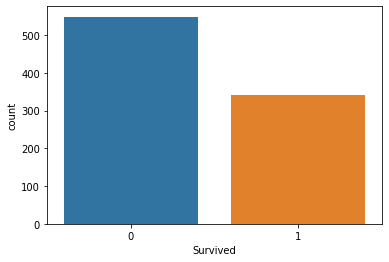

In [24]:
#Visualisation of Survived data
ax = sns.countplot(x='Survived',data=df_visualisation_nominal)
print(df_visualisation_nominal['Survived'].value_counts())

More people died(549) than survived(342)

3    491
1    216
2    184
Name: Pclass, dtype: int64


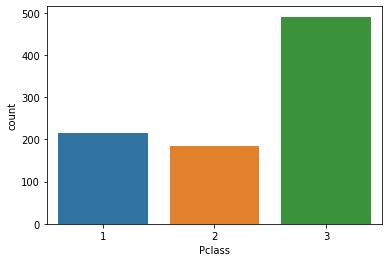

In [25]:
#Visualisation of Pclass data
ax = sns.countplot(x='Pclass',data=df_visualisation_nominal)
print(df_visualisation_nominal['Pclass'].value_counts())

Roughly 55% people were in Class3, 24% in Class1 and rest in Class2

In [26]:
#Making dataframe of Continous data
df_visualisation_continous = df[['Age','Fare']].copy()

<AxesSubplot:xlabel='Age', ylabel='Density'>

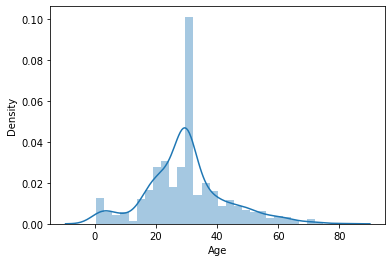

In [27]:
#Visualisation of Age data
sns.distplot(df_visualisation_continous['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

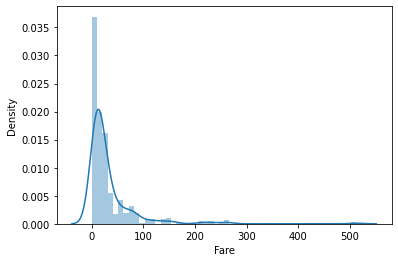

In [28]:
#Visualisation of Fare data
sns.distplot(df_visualisation_continous['Fare'])

Visualisation is completed

#Encoding of Dataframe(Converting String to numeric)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [30]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Family,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,3,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,8.0,30.0000,0.0


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,Family,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.904602,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.613459,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,10.000000,680.000000,512.329200,2.000000


<AxesSubplot:>

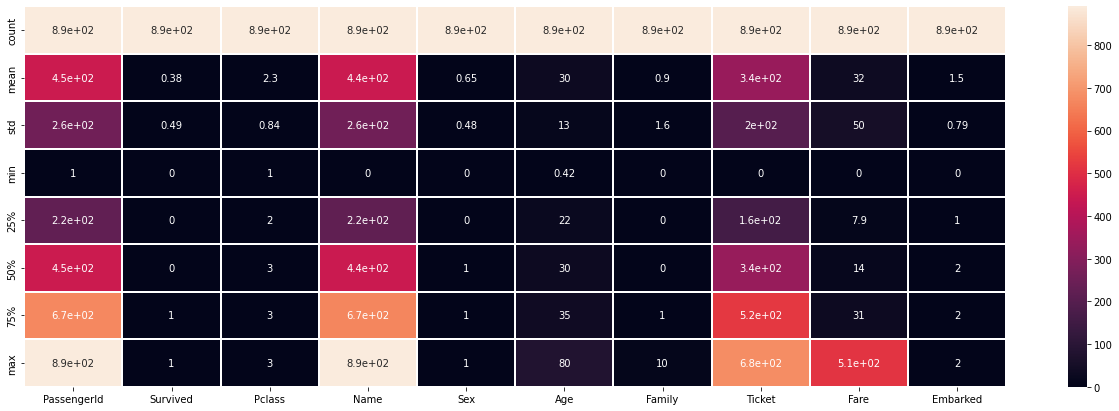

In [33]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [34]:
#Correlation of Columns with target column
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,Family,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.040143,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,0.016639,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.065997,0.319869,-0.549500,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.036309,0.047348,-0.049173,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.200988,0.059372,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.248512,-0.068848,0.091566,-0.026749
Family,-0.040143,0.016639,0.065997,-0.036309,-0.200988,-0.248512,1.000000,0.064302,0.217138,0.066516
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.064302,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.217138,-0.013885,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.006117,0.108262,-0.026749,0.066516,-0.001729,-0.224719,1.000000


<AxesSubplot:>

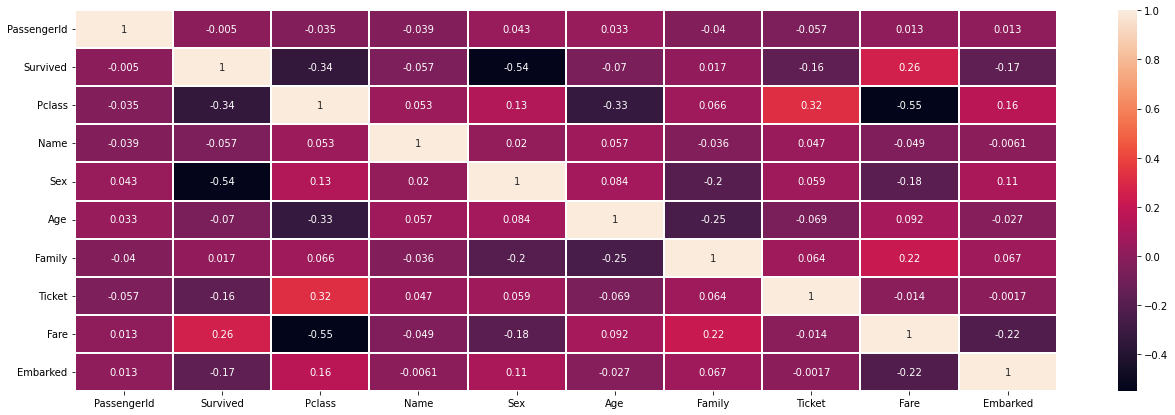

In [35]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (22,7))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

In [36]:
#Checking columns which appear to be highly correlated with target columns

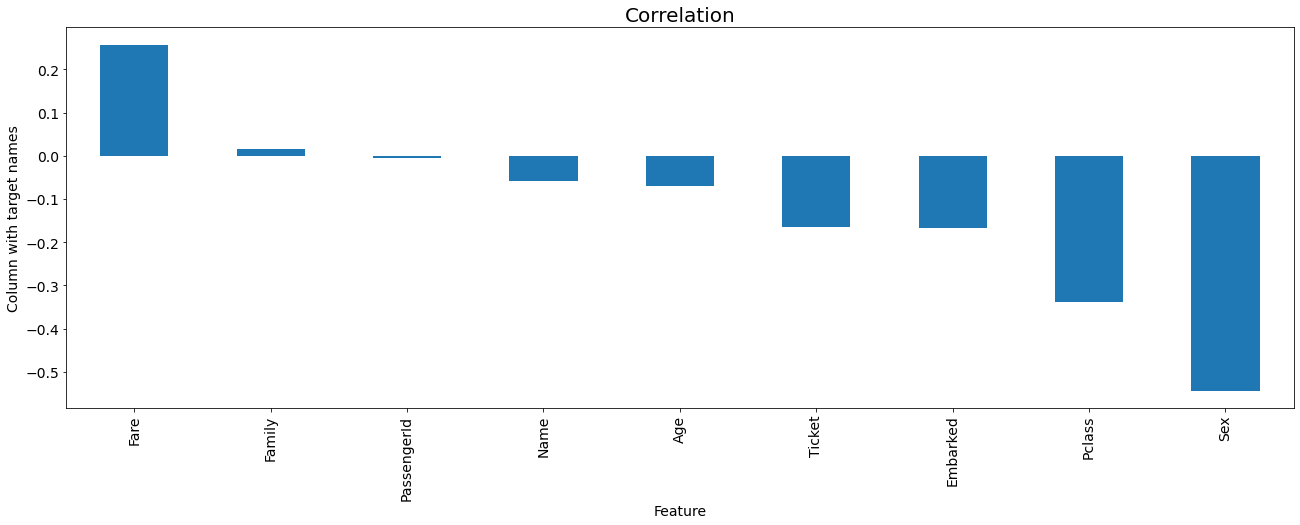

In [37]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

As we can see highest correlation is 55% which is good but not very high and that too only in 2 places only so we can ignore possiblity of multicollinearity

In [38]:
#Removing skewness
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
Family         2.727441
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

Acceptable skewness (-0.65,+0.65)

In [39]:
#Outlier check
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
Family           int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

<AxesSubplot:>

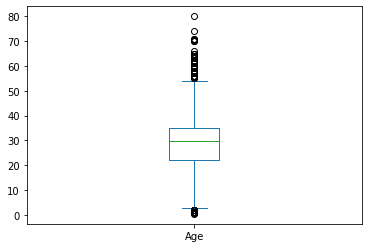

In [40]:
#Age and fare were the only continous data types
df['Age'].plot.box()

<AxesSubplot:>

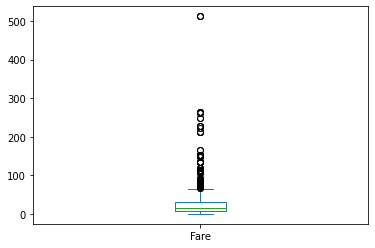

In [41]:
df['Fare'].plot.box()

In [42]:
#Because Age correlation with survived is very low(7%) and has lot of outliers and distribution of data is binodal so we can drop Age column
df = df.drop("Age",axis=1)

In [43]:
#Outlier removal using z-score
df.shape

(891, 9)

In [44]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([ 13,  25,  27,  59,  68,  71,  88, 118, 119, 159, 180, 182, 201,
        233, 258, 261, 299, 311, 324, 341, 377, 380, 386, 438, 480, 527,
        541, 542, 557, 610, 678, 679, 683, 689, 700, 716, 730, 737, 742,
        779, 792, 813, 846, 850, 863]),
 array([5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, 5, 7, 7, 5, 7, 7, 7,
        5, 7, 5, 7, 5, 5, 7, 5, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5,
        5]))

In [45]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,PassengerId,Survived,Pclass,Name,Sex,Family,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,1,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,1,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,1,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,3,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,0,8.0,30.0000,0.0


In [46]:
df_new_z.shape

(846, 9)

In [47]:
#Data Loss
Data_loss = (891-839)/891*100
Data_loss

5.836139169472503

Separating the columns into features and target

In [123]:
feature = df_new_z.drop("Survived",axis=1)
target = df_new_z["Survived"]

Scaling Data using Min-Max Scaler

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
for i in range(0,100):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(accuracy_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(accuracy_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.7781065088757396
At random state 0 the testing accuracy is : 0.8058823529411765


At random state 1 the training accuracy is : 0.8076923076923077
At random state 1 the testing accuracy is : 0.7294117647058823


At random state 2 the training accuracy is : 0.7899408284023669
At random state 2 the testing accuracy is : 0.7941176470588235


At random state 3 the training accuracy is : 0.7795857988165681
At random state 3 the testing accuracy is : 0.8294117647058824


At random state 4 the training accuracy is : 0.7973372781065089
At random state 4 the testing accuracy is : 0.7705882352941177


At random state 5 the training accuracy is : 0.8017751479289941
At random state 5 the testing accuracy is : 0.7529411764705882


At random state 6 the training accuracy is : 0.8091715976331361
At random state 6 the testing accuracy is : 0.7470588235294118


At random state 7 the training accuracy is : 0.7884615384615384
At random state 7 the testing acc

At random state 63 the training accuracy is : 0.7943786982248521
At random state 63 the testing accuracy is : 0.7941176470588235


At random state 64 the training accuracy is : 0.7973372781065089
At random state 64 the testing accuracy is : 0.7705882352941177


At random state 65 the training accuracy is : 0.7899408284023669
At random state 65 the testing accuracy is : 0.788235294117647


At random state 66 the training accuracy is : 0.7884615384615384
At random state 66 the testing accuracy is : 0.8058823529411765


At random state 67 the training accuracy is : 0.7840236686390533
At random state 67 the testing accuracy is : 0.788235294117647


At random state 68 the training accuracy is : 0.7943786982248521
At random state 68 the testing accuracy is : 0.8294117647058824


At random state 69 the training accuracy is : 0.7825443786982249
At random state 69 the testing accuracy is : 0.8058823529411765


At random state 70 the training accuracy is : 0.8017751479289941
At random state 70 t

In [127]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 1)

In [128]:
lr.fit(features_train,target_train)

LogisticRegression()

In [129]:
pred_test = lr.predict(features_test)

In [130]:
print(accuracy_score(target_test,pred_test))

0.7294117647058823


In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix for model : \n",confusion_matrix(target_test,pred_test))
print("Classification Report for train data : \n",classification_report(target_train,pred_train))
print("Classification Report for test data : \n",classification_report(target_test,pred_test))

Confusion matrix for model : 
 [[80 20]
 [26 44]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       0.62      0.62      0.62       422
           1       0.36      0.35      0.36       254

    accuracy                           0.52       676
   macro avg       0.49      0.49      0.49       676
weighted avg       0.52      0.52      0.52       676

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.69      0.63      0.66        70

    accuracy                           0.73       170
   macro avg       0.72      0.71      0.72       170
weighted avg       0.73      0.73      0.73       170



Cross Validation of model

In [132]:
Train_accuracy = accuracy_score(target_train,pred_train)
Test_accuracy = accuracy_score(target_test,pred_test)

In [133]:
from sklearn.model_selection import cross_val_score

for j in range(2,20):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.7659574468085106 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 3 the cv score is 0.7825059101654847 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 4 the cv score is 0.7742443888044352 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 5 the cv score is 0.7860285415941524 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 6 the cv score is 0.7813238770685579 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 7 the cv score is 0.7872687918142464 and accuracy score for training is 0.522189349112426 and accuracy score for testing is 0.7294117647058823


At cross fold 8 the cv score is 0.787241689128

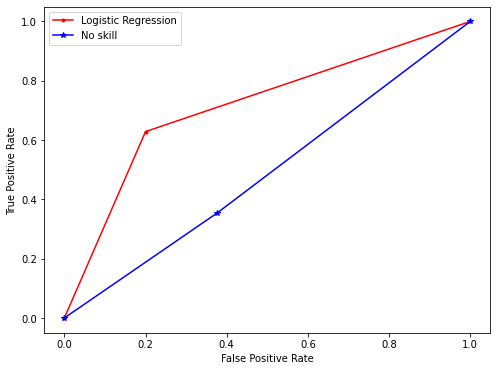

In [134]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(target_test, pred_test)
lr_fpr1, lr_tpr1, _ = roc_curve(target_train, pred_train)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression', color='r')
plt.plot(lr_fpr1, lr_tpr1, marker='*', label='No skill', color='b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

Logistic regression is overfitting

Other models are:

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
    print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
    print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
    print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))

In [137]:
from sklearn.svm import SVC
model_selection(SVC(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.6893491124260355
Accuracy for the testing model :  0.6294117647058823
Confusion matrix for model : 
 [[92  8]
 [55 15]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       0.68      0.95      0.79       422
           1       0.74      0.26      0.39       254

    accuracy                           0.69       676
   macro avg       0.71      0.60      0.59       676
weighted avg       0.70      0.69      0.64       676

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.63      0.92      0.74       100
           1       0.65      0.21      0.32        70

    accuracy                           0.63       170
   macro avg       0.64      0.57      0.53       170
weighted avg       0.64      0.63      0.57       170



In [138]:
from sklearn.neighbors import KNeighborsClassifier
model_selection(KNeighborsClassifier(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.75
Accuracy for the testing model :  0.5823529411764706
Confusion matrix for model : 
 [[79 21]
 [50 20]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       422
           1       0.69      0.61      0.65       254

    accuracy                           0.75       676
   macro avg       0.73      0.72      0.73       676
weighted avg       0.75      0.75      0.75       676

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.61      0.79      0.69       100
           1       0.49      0.29      0.36        70

    accuracy                           0.58       170
   macro avg       0.55      0.54      0.53       170
weighted avg       0.56      0.58      0.55       170



In [139]:
from sklearn.tree import DecisionTreeClassifier
model_selection(DecisionTreeClassifier(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  1.0
Accuracy for the testing model :  0.7235294117647059
Confusion matrix for model : 
 [[76 24]
 [23 47]]
Classification Report for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       1.00      1.00      1.00       254

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Classification Report for test data : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       100
           1       0.66      0.67      0.67        70

    accuracy                           0.72       170
   macro avg       0.71      0.72      0.72       170
weighted avg       0.72      0.72      0.72       170



Conclusion : Decision tree Classifier is giving best test accuracy of 72.35%